# Gaussian Naive Bayes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB

In [4]:
x1=np.random.rand(20,2)+1
y1=np.zeros((20,1))

In [5]:
x2=np.random.rand(20,2)-0.5
y2=np.ones((20,1))

In [8]:
x=np.vstack((x1,x2))

In [9]:
y=np.vstack((y1,y2))

In [10]:
print(x.shape,y.shape)

(40, 2) (40, 1)


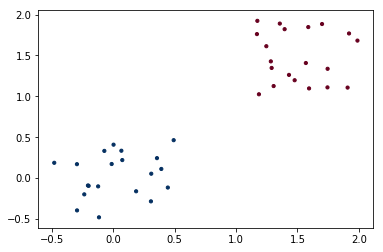

In [15]:
plt.scatter(x[:,0],x[:,1],c=y.reshape(40,),s=10,cmap="RdBu")

In [16]:
model=GaussianNB()
model.fit(x,y)

/home/lill/.local/lib/python3.5/site-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [17]:
xPred=np.random.rand(1,2)+1
yPred=model.predict(xPred)

[0.]


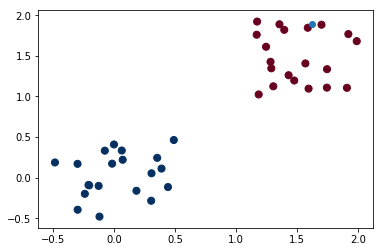

In [26]:
print(yPred)
plt.scatter(x[:,0],x[:,1],c=y.reshape(40,),s=50,cmap="RdBu")
plt.scatter(xPred[:,0],xPred[:,1])

# Multinomial Naive Bayes( Dung cho xu li text)

ta sẽ sử dụng tập dữ liệu 20newsgroups để test, tập dữ liệu này sẽ có 20 loại văn bản

In [27]:
from sklearn.datasets import fetch_20newsgroups

In [28]:
data=fetch_20newsgroups()
print(data)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [29]:
print(data.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


Ta thấy có rất nhiều loại văn bản(20 loại) ta sẽ lấy ra 3 loại văn bản để tải về và train

In [32]:
categories=['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc']
train=fetch_20newsgroups(subset='train',categories=categories)
test=fetch_20newsgroups(subset='test',categories=categories)

Ta đã tải về xong, train: dữ liệu train, test: dữ liệu test, cùng overview xem dữ liệu có gì nhé

In [33]:
print(train.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc']


In [37]:
print(len(train.data))
print(train.data[0])

1655
From: dcoleman@utxvms.cc.utexas.edu (Daniel M. Coleman)
Subject: Re: ATI Ultra Pro Confirmation
Lines: 41
Nntp-Posting-Host: blonde.cc.utexas.edu
Organization: The University of Texas at Austin
Lines: 41

In article <Fn+0rAZBBh107h@eosvcr.wimsey.bc.ca>, aew@eosvcr.wimsey.bc.ca (Alan Walford) writes:
> I have heard many things about the ATI Ultra Pro card. Some have
> been positive but most are negative. Could people please confirm
> these?  (I am interested in the EISA version in particular).
> 
> 1) The card does not work in a system with 32M RAM.

The higher memory limits apply to ISA cards only, as far as I know.  The VLB
and EISA version should have no problems.
 
> 2) The card works in a 32M system with some switches
>    set but it is much slower.

Again, the memory aperture need only be disabled if you have more than 124M RAM
(EISA and VLB) or 12 M (ISA).  32M should not be a problem for you. 
 
> 3) The card is _interlaced_ in its 24bit (true-colour) modes.

Nope.  I can u

In [39]:
print(len(test.data))

1102


có 1655 bản để train và 1102 bản để test nhé. 
Dữ liệu bây h toàn là text, ta sẽ dùng feature Engineering text để đưa text về dạng vector(rõ hơn xem pythondatasciencebook tang 375) Ta sẽ điểm lại 1 chút về kỹ thật này trước khi train model. let's go


In [41]:
from sklearn.feature_extraction.text import CountVectorizer

In [42]:
samples=["mot la mot",
        "hai la hai",
        "ba la ba"]
vec=CountVectorizer()
X=vec.fit_transform(samples)

In [43]:
print(X)

  (0, 3)	2
  (0, 2)	1
  (1, 2)	1
  (1, 1)	2
  (2, 2)	1
  (2, 0)	2


dữ liệu bây h đã được chuyển về vector nhưng khó nhìn quá, dunngf cái khác để cho dễ nhìn nhé

In [45]:
import pandas as pd


/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [47]:
pd.DataFrame(data=X.toarray(),columns=vec.get_feature_names())

,ba,hai,la,mot
0,0,0,1,2
1,0,2,1,0
2,2,0,1,0


CountVectorizer này là đếm số lần từ xuất hiện trong câu nhưng có vẻ k ôn, vì nếu 1 từ xuất hiện quá nhiều thì lại ảnh hưởng quá lớn vì chưa bt là độ quan trọng của từ đó là cao hay thấp
Do đó ta dunngf 1 hàm khác đánh giá sự quan trong của từ 

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer 
vec1=TfidfVectorizer()
X1=vec1.fit_transform(samples)
pd.DataFrame(data=X1.toarray(),columns=vec1.get_feature_names())

,ba,hai,la,mot
0,0.000000,0.000000,0.283217,0.959056
1,0.000000,0.959056,0.283217,0.000000
2,0.959056,0.000000,0.283217,0.000000


Ngoài lề: Ta có hàm TfidfTransformer nó cũng giống như hàm TfidfVectorizer nhưng hàm TfidfTransformer phải chuyển dữ liệu về dạng vector như hàm trên cùng sau mới đưa về dạng như TfidfVectorizer được. 
OK come back and done your job!

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB

In [50]:
model=make_pipeline(TfidfVectorizer(),MultinomialNB())

In [51]:
model.fit(train.data,train.target)

Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('multinomialnb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [58]:
outpre=model.predict(test.data)

In [65]:
from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sns


Text(91.67999999999999, 0.5, 'prelabel')

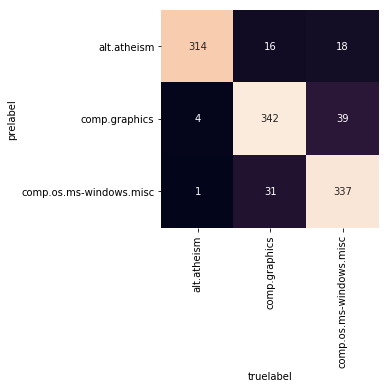

In [64]:
mat=confusion_matrix(test.target,outpre)
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False,xticklabels=train.target_names,yticklabels=train.target_names)
plt.xlabel('truelabel')
plt.ylabel('prelabel')

In [66]:
print(accuracy_score(outpre,test.target))

0.9010889292196007


chinh xac 90%

In [56]:
def predictFuction(s,model=model,target=train.target_names):
    pred=model.predict([s])
    return target[pred[0]]

In [57]:
predictFuction("sending a payload")

'comp.graphics'